# Bayes Theorem 

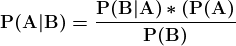 


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
tennis = pd.read_csv("/home/ramar/2021 - Projects/upwork-ref/play_tennis.csv")

In [13]:
tennis 

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [15]:
outlook = tennis.groupby(['outlook', 'play']).size()
temp = tennis.groupby(['temp', 'play']).size()
humidity = tennis.groupby(['humidity', 'play']).size()
windy = tennis.groupby(['wind', 'play']).size()
play = tennis.play.value_counts()

In [17]:
print(temp)
print('------------------')
print(humidity)
print('------------------')
print(windy)
print('------------------')
print(outlook)
print('------------------')
print('play')
print(play)

temp  play
Cool  No      1
      Yes     3
Hot   No      2
      Yes     2
Mild  No      2
      Yes     4
dtype: int64
------------------
humidity  play
High      No      4
          Yes     3
Normal    No      1
          Yes     6
dtype: int64
------------------
wind    play
Strong  No      3
        Yes     3
Weak    No      2
        Yes     6
dtype: int64
------------------
outlook   play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
dtype: int64
------------------
play
Yes    9
No     5
Name: play, dtype: int64


## to finding the probability of playing tennis, from given rainy data

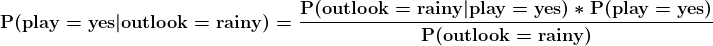

In [18]:
(3/9)*(9/14)/(5/14)

0.6

The probability of playing tennis when it is rainy is 60%. The process is very simple once you obtain the frequencies for each category.

In [19]:
def bayestheorem():
    print('Posterior [P(c|x)] - Posterior probability of the target/class (c) given predictors (x)'),
    print('Prior [P(c)] - Prior probability of the class (target)'),
    print('Likelihood [P(x|c)] - Probability of the predictor (x) given the class/target (c)'),
    print('Evidence [P(x)] - Prior probability of the predictor (x))')

In [20]:
def bayesposterior(prior, likelihood, evidence, string):
      print('Prior=', prior),
      print('Likelihood=', likelihood),
      print('Evidence=', evidence),
      print('Equation =','(Prior*Likelihood)/Evidence')
      print(string, (prior*likelihood)/evidence)

In [21]:
# to find the posterior probability this time using contingency tables

ct = pd.crosstab(tennis['outlook'], tennis['play'], margins = True)
print(ct)

play      No  Yes  All
outlook               
Overcast   0    4    4
Rain       2    3    5
Sunny      3    2    5
All        5    9   14


In [22]:
ct.columns = ["no","yes","rowtotal"]
ct.index= ["overcast","rainy","sunny","coltotal"]
ct / ct.loc["coltotal","rowtotal"]

,no,yes,rowtotal
overcast,0.000000,0.285714,0.285714
rainy,0.142857,0.214286,0.357143
sunny,0.214286,0.142857,0.357143
coltotal,0.357143,0.642857,1.000000


In [23]:
ct / ct.loc["coltotal"]

,no,yes,rowtotal
overcast,0.0,0.444444,0.285714
rainy,0.4,0.333333,0.357143
sunny,0.6,0.222222,0.357143
coltotal,1.0,1.000000,1.000000


In [24]:
ct.div(ct["rowtotal"], axis=0)

,no,yes,rowtotal
overcast,0.000000,1.000000,1.0
rainy,0.400000,0.600000,1.0
sunny,0.600000,0.400000,1.0
coltotal,0.357143,0.642857,1.0


These tables are all pandas dataframe objects. 
Therefore using pandas subsetting and the bayesposterior function I made, we can arrive at the same conclusion:


In [25]:
bayesposterior(prior = ct.iloc[1,1]/ct.iloc[3,1],
               likelihood = ct.iloc[3,1]/ct.iloc[3,2],
               evidence = ct.iloc[1,2]/ct.iloc[3,2],
               string = 'Probability of Tennis given Rain =')

Prior= 0.3333333333333333
Likelihood= 0.6428571428571429
Evidence= 0.35714285714285715
Equation = (Prior*Likelihood)/Evidence
Probability of Tennis given Rain = 0.6


## Naive Bayes Algorithm 

Naive Bayes is a supervised Machine Learning algorithm inspired by the Bayes theorem. It works on the principles of conditional probability. Naive Bayes is a classification algorithm for binary and multi-class classification. The Naive Bayes algorithm uses the probabilities of each attribute belonging to each class to make a prediction.

Problem Statement : What is the probability of playing tennis when it is sunny, hot, highly humid and windy? So using the tennis dataset, we need to use the Naive Bayes method to predict the probability of someone playing tennis given the mentioned weather conditions.

In [27]:
pd.crosstab(tennis['outlook'], tennis['play'], margins = True)

play,No,Yes,All
outlook,,,
Overcast,0,4,4
Rain,2,3,5
Sunny,3,2,5
All,5,9,14


In [28]:
pd.crosstab(tennis['temp'], tennis['play'], margins = True)

play,No,Yes,All
temp,,,
Cool,1,3,4
Hot,2,2,4
Mild,2,4,6
All,5,9,14


In [29]:
pd.crosstab(tennis['humidity'], tennis['play'], margins = True)

play,No,Yes,All
humidity,,,
High,4,3,7
Normal,1,6,7
All,5,9,14


In [31]:
pd.crosstab(tennis['wind'], tennis['play'], margins = True)

play,No,Yes,All
wind,,,
Strong,3,3,6
Weak,2,6,8
All,5,9,14


In [32]:
pd.crosstab(index=tennis['play'],columns="count", margins=True)

col_0,count,All
play,,
No,5,5
Yes,9,9
All,14,14


### Calculate P(x|play=yes). In this case x refers to all the predictors 'outlook', 'temp', 'humidity' and 'windy'.

In [33]:
p_x_yes = ((2/9)*(2/9)*(3/9)*(3/9))
print('The probability of the predictors given playing tennis is', '%.3f'%p_x_yes)

The probability of the predictors given playing tennis is 0.005


### Calculate P(x|play=no) using the same method as above.

In [34]:
p_x_no = ((3/5)*(2/5)*(4/5)*(3/5))
print('The probability of the predictors given not playing tennis is ', '%.3f'%p_x_no)

The probability of the predictors given not playing tennis is  0.115


### Calculate P(play=yes) and P(play=no)

In [35]:
yes = (9/14)
no = (5/14)
print('The probability of playing tennis is', '%.3f'% yes)
print('The probability of not playing tennis is', '%.3f'% no)

The probability of playing tennis is 0.643
The probability of not playing tennis is 0.357


### Calculate the probability of playing and not playing tennis given the predictors

In [36]:
yes_x = p_x_yes*yes
print('The probability of playing tennis given the predictors is', '%.3f'%yes_x)

no_x = p_x_no*no
print('The probability of not playing tennis given the predictors is', '%.3f'%no_x)

The probability of playing tennis given the predictors is 0.004
The probability of not playing tennis given the predictors is 0.041


In [37]:
if yes_x > no_x:
  print('The probability of playing tennis when the outlook is sunny, the temperature is hot, there is high humidity and windy is higher')
else:
  print('The probability of not playing tennis when the outlook is sunny, the temperature is hot, there is high humidity and windy is higher')

The probability of not playing tennis when the outlook is sunny, the temperature is hot, there is high humidity and windy is higher


The probability of not playing tennis is higher when the outlook is sunny, the temperature is hot, there is high humidity and it is windy.